<a href="https://colab.research.google.com/github/SrikanthDodle/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement


In this project, the objective is to leverage a simple neural network to predict breast cancer diagnoses based on clinical features. The dataset, obtained from the sklearn library, comprises information on tumor characteristics, and each instance is labeled as malignant or benign.

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn

Data Collection and Processing

In [ ]:
#load data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# load the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
#label contains 1 & 0s. 1 means the cancer is benign and 0 means malignant(harmful).
df['label'] = breast_cancer_dataset.target

In [ ]:
#first 5 rows of DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#Columns in Dataframe
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [ ]:
#rows and columns in dataframe
df.shape

(569, 31)

In [ ]:
#check if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#distribution of target variables
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> benign

0 --> malignant (Harmful)

In [ ]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


We can observe that the mean values of Malignant cancer has high values compared to Benign values

Now Seperate the Target variable from features

In [ ]:
x = df.drop(columns='label',axis=1)
y = df['label']

In [ ]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Spit the data in train and test datasets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test)

Build Neural Network

In [ ]:
#Import tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3) # for reproducability
from tensorflow import keras

In [ ]:
#Model Setup
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])


In [ ]:
# Compile the Model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#train the Neural Network
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=20)



Epoch 1/20
13/13 [==============================] - 6s 35ms/step - loss: 0.8332 - accuracy: 0.5232 - val_loss: 0.4997 - val_accuracy: 0.7609
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5136 - accuracy: 0.7604 - val_loss: 0.3294 - val_accuracy: 0.8696
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 0.3602 - accuracy: 0.8533 - val_loss: 0.2494 - val_accuracy: 0.9130
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.2859 - accuracy: 0.8998 - val_loss: 0.2070 - val_accuracy: 0.9348
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.9242 - val_loss: 0.1820 - val_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.2048 - accuracy: 0.9413 - val_loss: 0.1646 - val_accuracy: 0.9565
Epoch 7/20
13/13 [==============================] - 0s 11ms/step - loss: 0.1823 - accuracy: 0.9462 - val_loss: 0.1515 - val_accuracy: 0.9565
Epoch 8/20
13/1

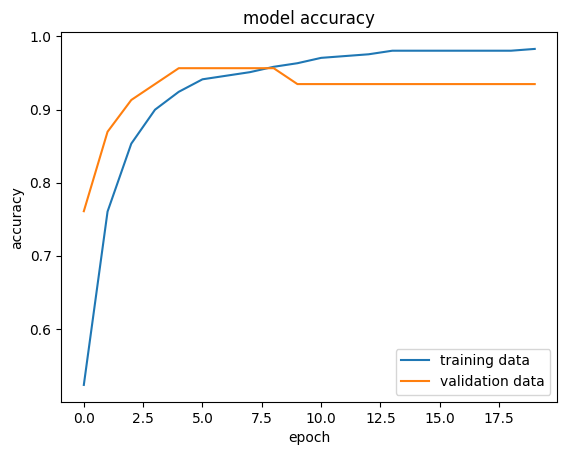

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

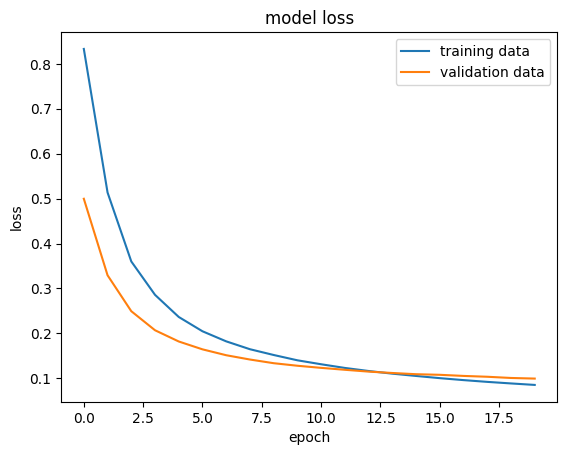

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1049 - accuracy: 0.9474
0.9473684430122375


In [ ]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.16248739 0.48932528]


In [ ]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(y_pred)

[[1.62487388e-01 4.89325285e-01]
 [5.44071078e-01 4.80515778e-01]
 [1.73543952e-02 8.81049871e-01]
 [9.99625802e-01 4.76475689e-04]
 [3.22851300e-01 5.99338770e-01]
 [9.98555958e-01 5.92819136e-03]
 [1.77065581e-01 5.94201326e-01]
 [2.82218177e-02 8.88932109e-01]
 [4.72563244e-02 8.06837201e-01]
 [5.34181893e-02 8.75252008e-01]
 [4.20034647e-01 5.01500189e-01]
 [1.42471999e-01 6.78238869e-01]
 [6.92346022e-02 7.71105230e-01]
 [1.43495739e-01 7.08098769e-01]
 [3.95239666e-02 8.72943938e-01]
 [8.68379116e-01 6.98683336e-02]
 [2.11428646e-02 8.87735307e-01]
 [3.33120562e-02 7.27032900e-01]
 [3.97018380e-02 8.63131821e-01]
 [9.91386831e-01 2.23773438e-02]
 [9.53106489e-03 5.54389238e-01]
 [2.59757023e-02 8.56495261e-01]
 [3.02133132e-02 8.50166321e-01]
 [3.44233066e-02 8.69777739e-01]
 [1.64647371e-01 7.08830357e-01]
 [9.54493403e-01 5.89095056e-02]
 [1.65030226e-01 7.13794708e-01]
 [2.88147837e-01 6.23424470e-01]
 [9.68108058e-01 4.43701595e-02]
 [9.72436666e-01 2.57892311e-02]
 [8.783696

model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


Building the predictive system

In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 31ms/step
[[0.02760932 0.8882199 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
